# La pieza que falta

Todos tenemos por casa algún puzle al que le falta una pieza. Muchos años y limpiezas generales después de su desaparición, el paradero de esa pieza sigue siendo todo un misterio: tiene que estar en casa, pero ¿dónde? ¿Se habrá colado por el mismo agujero negro que engulle buena parte de los juguetes de los niños? ¿O estará junto con ese billete de 20 euros que tantas veces "juraríamos" tener en la cartera y que, sin embargo, siempre parece haberse volatilizado por algún milagro de la física?        

<img src="Pieza puzzle.jpg">

Puede que, a fecha de hoy, la inteligencia artificial aún no sea capaz dar respuesta al misterio de esos objetos cotidianos de los que nunca más supo. No obstante, tal vez sí pueda recrear esa pieza que nos falta... Un pequeño ejercicio de regresión con distintos algoritmos nos permitirá comprobarlo: para ello, en lugar de un puzle, emplearemos un archivo GIF y trataremos de predecir uno de sus fotogramas.

1. En primer lugar, cargamos todas las librerías y módulos que vamos a necesitar. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn import tree
from sklearn import svm
import os
import cv2
import cv
from PIL import Image
from IPython.core.display import Image as Imag

2. Elegimos un archivo GIF: por ejemplo, este del "simpático" personaje Ira, de la película "Del revés". 

![SegmentLocal](Anger.gif "segment")

3. Tras convertir los fotogramas del GIF en 23 archivos de imagen .jpg, visualizamos uno de ellos (el primero). 

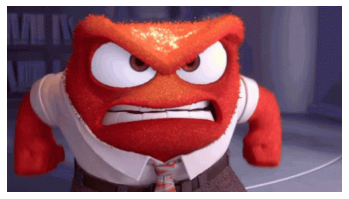

In [2]:
imagen = cv2.imread("Anger/0.jpg") # Lee la imagen
img = cv2.cvtColor(imagen,cv2.COLOR_BGR2RGB) # Convierte la imagen de BGR a RGB
plt.imshow(img) # Imprime la imagen
plt.axis('off') # Elimina los ejes
plt.show()

4. Comprobamos el tamaño de la imagen.

In [3]:
img.shape

(276, 498, 3)

5. A continuación, con un bucle, recorremos todos los fotogramas del GIF y los imprimimos en escala de grises.

0


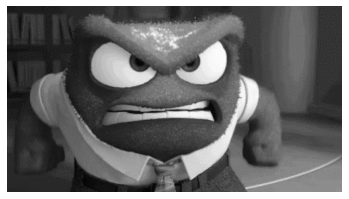

1


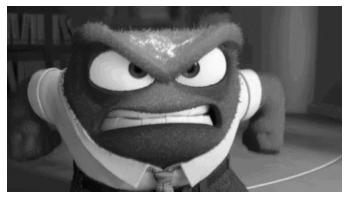

2


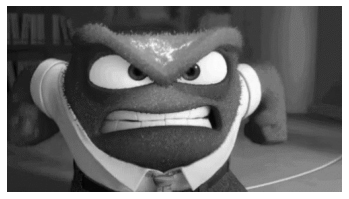

3


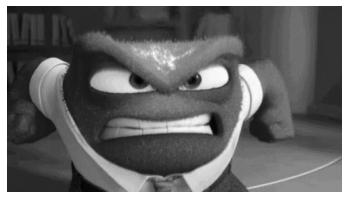

4


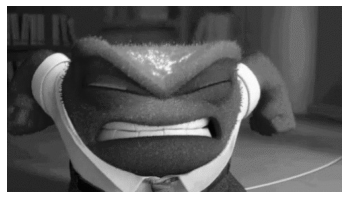

5


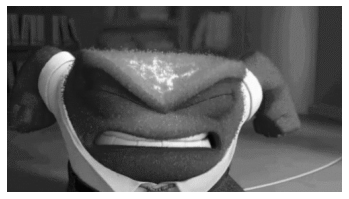

6


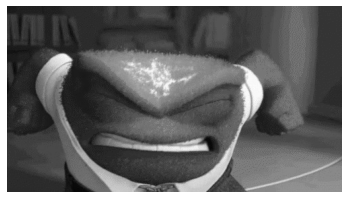

7


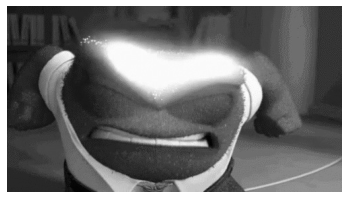

8


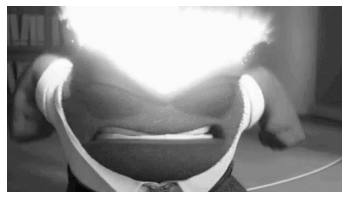

9


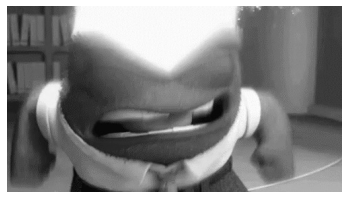

10


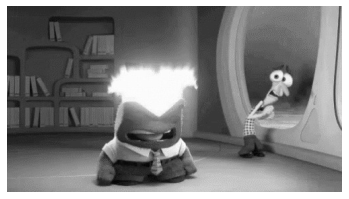

11


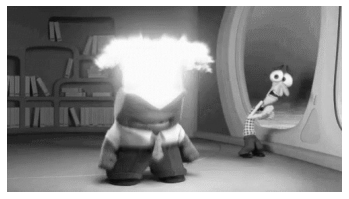

12


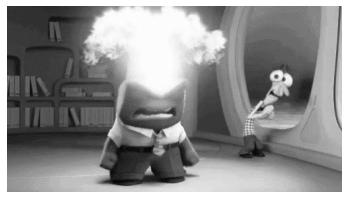

13


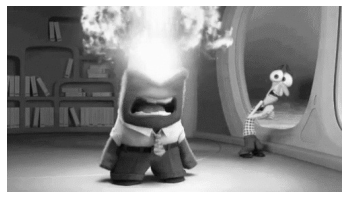

14


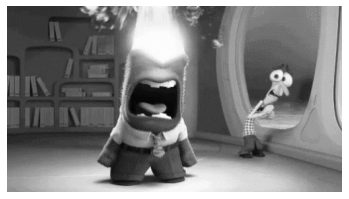

15


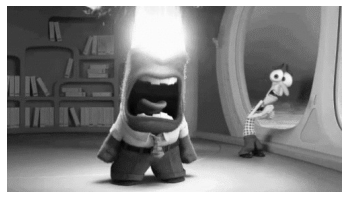

16


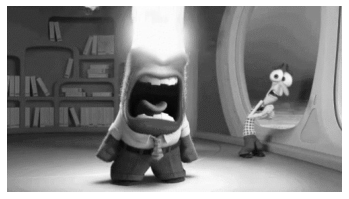

17


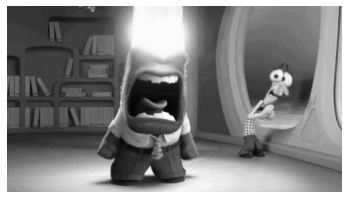

18


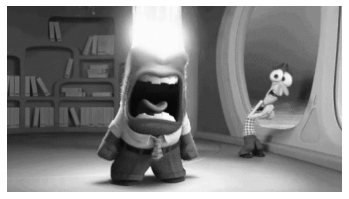

19


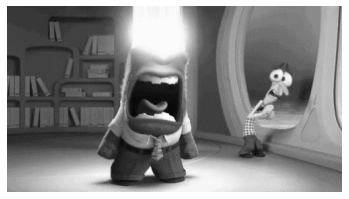

20


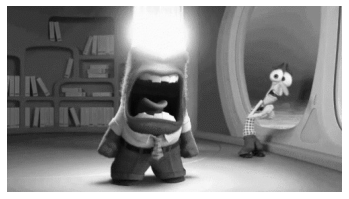

21


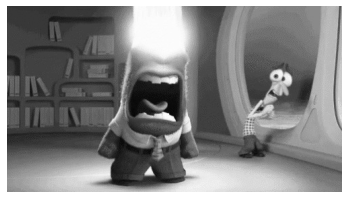

22


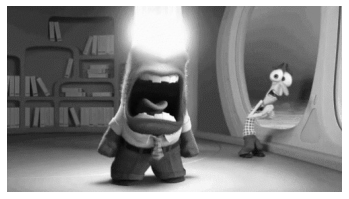

23


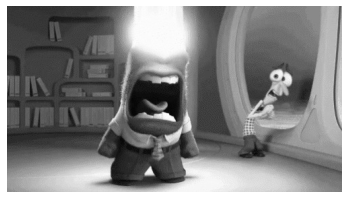

In [4]:
for i in range(24): # Recorre cada imagen de la carpeta del GIF 
    print(i) # Imprime el número de la imagen correspondiente
    imagen = cv2.imread("Anger/{}.jpg".format(i)) # Lee cada imagen
    img = cv2.cvtColor(imagen,cv2.COLOR_BGR2GRAY) # Convierte cada imagen de BGR a escala de grises 
    plt.imshow(img, cmap = "binary_r") # Muestra cada imagen en formato "binary_r"
    plt.axis('off') 
    plt.show()

6. Creamos una lista ("data") a la que añadimos todas las imágenes, menos la que queremos que prediga el modelo ("la pieza que falta"): por ejemplo, el fotograma 12.  

In [5]:
data = []
for i in range(24):
    if i != 12:
        imagen = cv2.imread("Anger/{}.jpg".format(i)) # Lee la imagen
        img = cv2.cvtColor(imagen,cv2.COLOR_BGR2GRAY) # Convierte la imagen de BGR a escala de grises 
        data.append(img.flatten()) # La función .flatten() aplana la imagen (concatena los píxeles para pasar de una matriz a un vector porque este es más fácil de recorrer) y .append agrega la imagen a la lista

7. Convertimos nuestra lista en un arreglo para poder introducirla en el modelo y comprobamos su tamaño: obtenemos un arreglo de 23 imágenes por 137 448 píxeles concatenados.

In [6]:
data = np.array(data)
data.shape

(23, 137448)

8. Creamos una lista vacía ("pixeles") a la que añadiremos la predicción del modelo. En la variable "obj" almacenamos el número del fotograma que queremos predecir. Un condicional, incluido en el bucle que recorrerá todos los píxeles de cada imagen, nos permitirá controlar el progreso del cálculo. En la variable "X" guardamos todas las imágenes, menos la de la predicción, y en la variable "y" almacenamos el valor de los píxeles de cada una de las imágenes (excepto la de la predicción). Para esta primera prueba, emplearemos un algoritmo de regresión lineal.   

In [7]:
pixeles = [] 
cont = 0
obj  = 12
for i in range(data.shape[1]): # Selecciona los 137 448 píxeles de cada imagen
    
    if i%13744 == 0: # Permite ver el avance del bucle 
        print(cont)
        cont+=1
        
    X = np.array(list(range(0,obj))+list(range(obj+1,24))).reshape(-1, 1) # Selecciona todas las imágenes (menos la de la predicción) y la función .reshape añade corchetes a cada elemento del arreglo (así lo requiere el modelo)
    y = data[:,i] # Selecciona el valor de los píxeles de todas las imágenes (menos la de la predicción)  
    regr = linear_model.LinearRegression()
    #regr = svm.SVR(kernel='rbf')
    #regr = tree.DecisionTreeRegressor()
    regr.fit(X, y)
    val = regr.predict(np.array([[obj]])) # Se le indica el valor de la x de la imagen que se va a predecir ("obj") para que calcule la y 
    pixeles.append(val)

0
1
2
3
4
5
6
7
8
9
10


9. Evaluamos el rendimiento del modelo.

In [8]:
regr.score(X, y)

0.26991856936529945

10. Asignamos la imagen de la predicción a la variable "target" y la devolvemos a su formato original. 

In [9]:
target = np.array(pixeles).reshape(276, 498) # Devuelve los datos al formato de matriz

11. Visualizamos la predicción del modelo. 

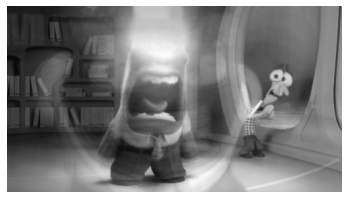

In [10]:
plt.imshow(target,cmap="binary_r")
plt.axis("off")
plt.show()

12. Comparamos la imagen obtenida con el fotograma anterior, el fotograma posterior y el orginal de la imagen que buscamos.

In [11]:
imagen = cv2.imread("Anger/{}.jpg".format(obj-1)) # Lee la imagen anterior a la de la predicción
img1 = cv2.cvtColor(imagen,cv2.COLOR_BGR2GRAY) # Convierte la imagen de BGR a RGB 
imagen = cv2.imread("Anger/{}.jpg".format(obj)) # Lee la imagen original que queremos predecir
img2 = cv2.cvtColor(imagen,cv2.COLOR_BGR2GRAY) # Convierte la imagen de BGR a RGB 
imagen = cv2.imread("Anger/{}.jpg".format(obj+1)) # Lee la imagen posterior a la de la predicción
img3 = cv2.cvtColor(imagen,cv2.COLOR_BGR2GRAY) # Convierte la imagen de BGR a RGB 

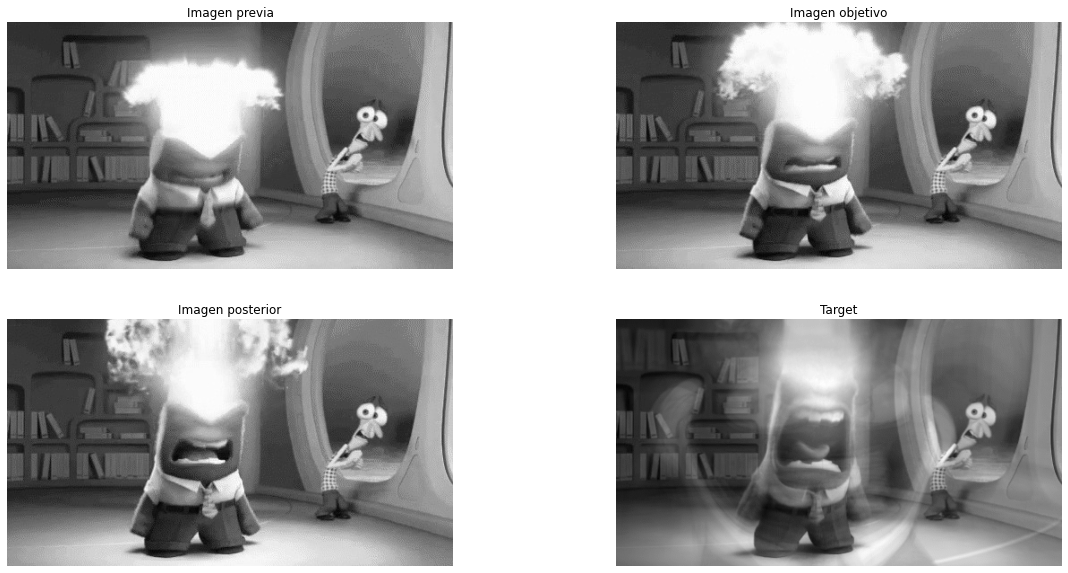

In [12]:
plt.figure(figsize=(20,10))
ax1 = plt.subplot(221)
ax1.set_title('Imagen previa')
ax1.imshow(img1, cmap = "binary_r")
ax1.axis("off")
ax2 = plt.subplot(222)
ax2.set_title('Imagen objetivo')
ax2.imshow(img2, cmap = "binary_r")
ax2.axis("off")
ax3 = plt.subplot(223)
ax3.set_title('Imagen posterior')
ax3.imshow(img3, cmap = "binary_r")
ax3.axis("off")
ax4 = plt.subplot(224)
ax4.set_title('Target')
ax4.imshow(target, cmap = "binary_r")
ax4.axis("off")
plt.show()

Como vemos, el resultado obtenido con el modelo de regresión lineal no es muy bueno (la baja puntuación de la métrica ya nos permitía intuirlo), así que vamos a limitar el número de imágenes introducidas en el modelo a aquellas que comparten plano con el fotograma que queremos predecir. 

In [13]:
data = []
for i in range(10,24):
    if i != 12:
        imagen = cv2.imread("Anger/{}.jpg".format(i))
        img = cv2.cvtColor(imagen,cv2.COLOR_BGR2GRAY) 
        data.append(img.flatten())
data = np.array(data)
pixeles = [] 
obj  = 12
for i in range(data.shape[1]):   
    X = np.array(list(range(10,obj))+list(range(obj+1,24))).reshape(-1, 1)
    y = data[:,i]    
    regr = linear_model.LinearRegression()
    #regr = svm.SVR(kernel='rbf')
    #regr = tree.DecisionTreeRegressor()
    regr.fit(X, y)
    val = regr.predict(np.array([[obj]])) 
    pixeles.append(val)
regr.score(X, y)

0.036783816674830105

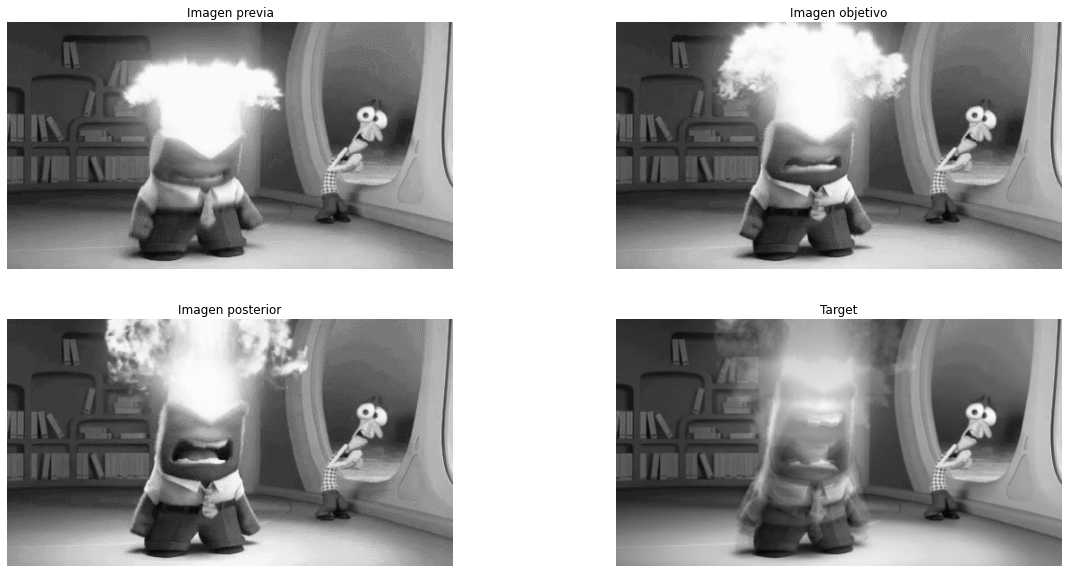

In [14]:
target = np.array(pixeles).reshape(276, 498) 

imagen = cv2.imread("Anger/{}.jpg".format(obj-1)) 
img1 = cv2.cvtColor(imagen,cv2.COLOR_BGR2GRAY)  
imagen = cv2.imread("Anger/{}.jpg".format(obj)) 
img2 = cv2.cvtColor(imagen,cv2.COLOR_BGR2GRAY)  
imagen = cv2.imread("Anger/{}.jpg".format(obj+1)) 
img3 = cv2.cvtColor(imagen,cv2.COLOR_BGR2GRAY)  

plt.figure(figsize=(20,10))
ax1 = plt.subplot(221)
ax1.set_title('Imagen previa')
ax1.imshow(img1, cmap = "binary_r")
ax1.axis("off")
ax2 = plt.subplot(222)
ax2.set_title('Imagen objetivo')
ax2.imshow(img2, cmap = "binary_r")
ax2.axis("off")
ax3 = plt.subplot(223)
ax3.set_title('Imagen posterior')
ax3.imshow(img3, cmap = "binary_r")
ax3.axis("off")
ax4 = plt.subplot(224)
ax4.set_title('Target')
ax4.imshow(target, cmap = "binary_r")
ax4.axis("off")
plt.show()

El hecho de limitar la información introducida en el modelo ha mejorado ligeramente el resultado (la puntuación ha subido un poco), pero no lo suficiente. Por ello, vamos a probar a realizar la predicción con otro algoritmo: el de SVM. Emplearemos los tres tipos de kernel y elegiremos el que ofrezca la puntuación más alta. 

In [15]:
data = []
for i in range(24):
    if i != 12:
        imagen = cv2.imread("Anger/{}.jpg".format(i))
        img = cv2.cvtColor(imagen,cv2.COLOR_BGR2GRAY) 
        data.append(img.flatten())
data = np.array(data)
pixeles = [] 
obj  = 12
for i in range(data.shape[1]):   
    X = np.array(list(range(0,obj))+list(range(obj+1,24))).reshape(-1, 1)
    y = data[:,i]    
    #regr = linear_model.LinearRegression()
    #regr = tree.DecisionTreeRegressor()
    regr1 = svm.SVR(kernel='rbf')
    regr1.fit(X, y)
    regr2 = svm.SVR(kernel='linear')
    regr2.fit(X, y)
    regr3 = svm.SVR(kernel='poly')
    regr3.fit(X, y)    
regr1.score(X, y), regr2.score(X, y), regr3.score(X, y)

(0.238379137803984, 0.24641409872701425, 0.23309004370701347)

Nos quedaremos con el resultado del modelo del kernel lineal, ya que es el que ha obtenido la puntuación más alta.

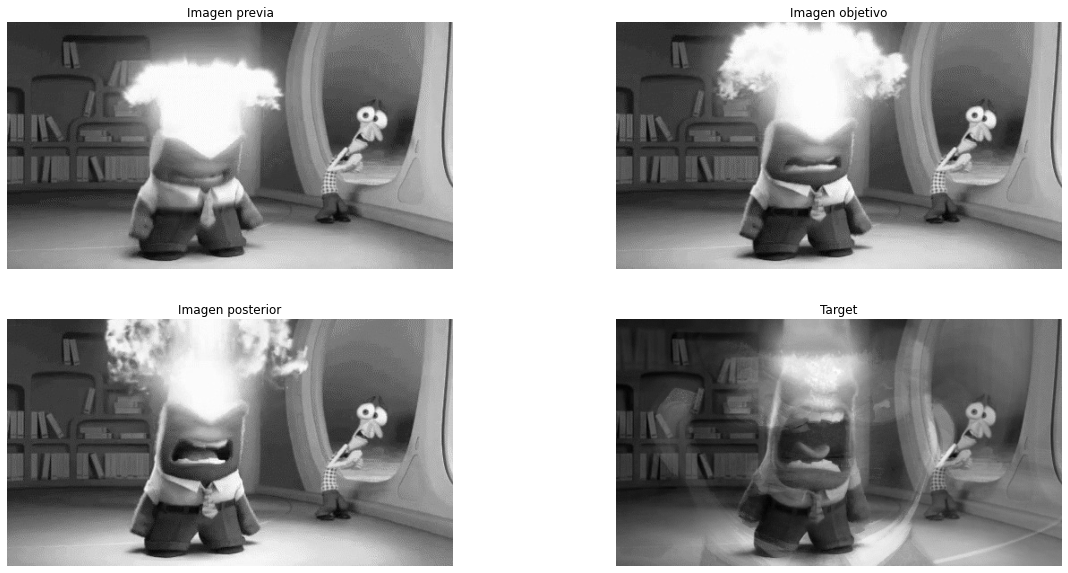

In [16]:
data = []
for i in range(24):
    if i != 12:
        imagen = cv2.imread("Anger/{}.jpg".format(i))
        img = cv2.cvtColor(imagen,cv2.COLOR_BGR2GRAY) 
        data.append(img.flatten())
data = np.array(data)
pixeles = [] 
obj  = 12
for i in range(data.shape[1]):   
    X = np.array(list(range(0,obj))+list(range(obj+1,24))).reshape(-1, 1)
    y = data[:,i]    
    #regr = linear_model.LinearRegression()
    #regr = tree.DecisionTreeRegressor()
    regr = svm.SVR(kernel='linear')
    regr.fit(X, y)
    val = regr.predict(np.array([[obj]])) 
    pixeles.append(val)
target = np.array(pixeles).reshape(276, 498) 

imagen = cv2.imread("Anger/{}.jpg".format(obj-1)) 
img1 = cv2.cvtColor(imagen,cv2.COLOR_BGR2GRAY)  
imagen = cv2.imread("Anger/{}.jpg".format(obj)) 
img2 = cv2.cvtColor(imagen,cv2.COLOR_BGR2GRAY)  
imagen = cv2.imread("Anger/{}.jpg".format(obj+1)) 
img3 = cv2.cvtColor(imagen,cv2.COLOR_BGR2GRAY)  

plt.figure(figsize=(20,10))
ax1 = plt.subplot(221)
ax1.set_title('Imagen previa')
ax1.imshow(img1, cmap = "binary_r")
ax1.axis("off")
ax2 = plt.subplot(222)
ax2.set_title('Imagen objetivo')
ax2.imshow(img2, cmap = "binary_r")
ax2.axis("off")
ax3 = plt.subplot(223)
ax3.set_title('Imagen posterior')
ax3.imshow(img3, cmap = "binary_r")
ax3.axis("off")
ax4 = plt.subplot(224)
ax4.set_title('Target')
ax4.imshow(target, cmap = "binary_r")
ax4.axis("off")
plt.show()

De nuevo, el resultado no es bueno, así que limitaremos la información de entrada otra vez, para ver si con eso mejora.

In [17]:
data = []
for i in range(10,24):
    if i != 12:
        imagen = cv2.imread("Anger/{}.jpg".format(i))
        img = cv2.cvtColor(imagen,cv2.COLOR_BGR2GRAY) 
        data.append(img.flatten())
data = np.array(data)
pixeles = [] 
obj  = 12
for i in range(data.shape[1]):   
    X = np.array(list(range(10,obj))+list(range(obj+1,24))).reshape(-1, 1)
    y = data[:,i]    
    #regr = linear_model.LinearRegression()
    #regr = tree.DecisionTreeRegressor()
    regr = svm.SVR(kernel='linear')
    regr.fit(X, y)
    val = regr.predict(np.array([[obj]])) 
    pixeles.append(val)
regr.score(X, y)

-0.018333333333324875

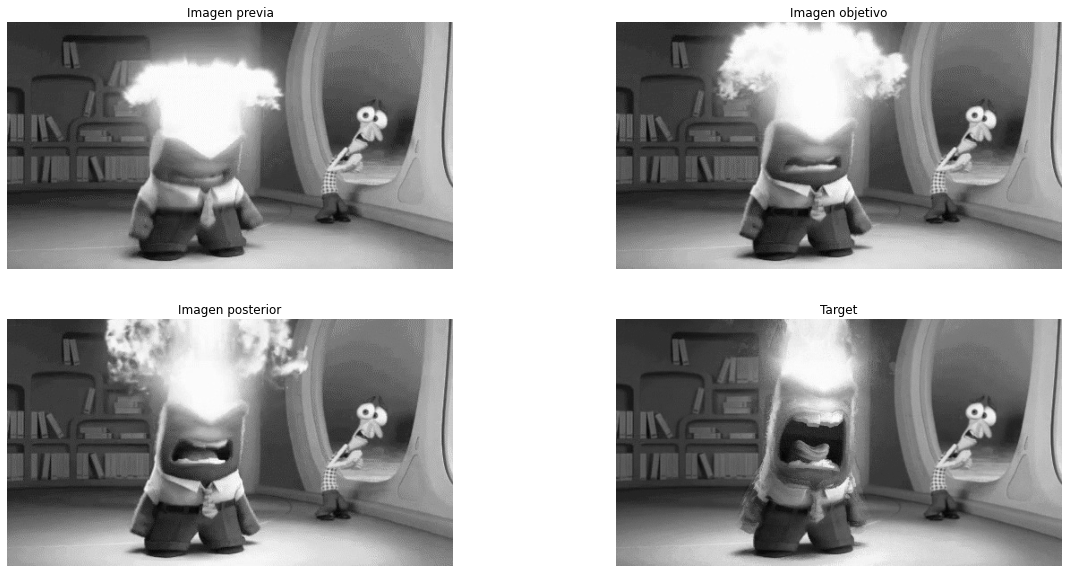

In [18]:
target = np.array(pixeles).reshape(276, 498) 

imagen = cv2.imread("Anger/{}.jpg".format(obj-1)) 
img1 = cv2.cvtColor(imagen,cv2.COLOR_BGR2GRAY)  
imagen = cv2.imread("Anger/{}.jpg".format(obj)) 
img2 = cv2.cvtColor(imagen,cv2.COLOR_BGR2GRAY)  
imagen = cv2.imread("Anger/{}.jpg".format(obj+1)) 
img3 = cv2.cvtColor(imagen,cv2.COLOR_BGR2GRAY)  

plt.figure(figsize=(20,10))
ax1 = plt.subplot(221)
ax1.set_title('Imagen previa')
ax1.imshow(img1, cmap = "binary_r")
ax1.axis("off")
ax2 = plt.subplot(222)
ax2.set_title('Imagen objetivo')
ax2.imshow(img2, cmap = "binary_r")
ax2.axis("off")
ax3 = plt.subplot(223)
ax3.set_title('Imagen posterior')
ax3.imshow(img3, cmap = "binary_r")
ax3.axis("off")
ax4 = plt.subplot(224)
ax4.set_title('Target')
ax4.imshow(target, cmap = "binary_r")
ax4.axis("off")
plt.show()

También con este algoritmo, la reducción del número de fotogramas mejora la imagen obtenida. No obstante, el resultado sigue sin ser óptimo, de modo que lo vamos a intentar una última vez con un árbol de decisión. 

In [19]:
data = []
for i in range(24):
    if i != 12:
        imagen = cv2.imread("Anger/{}.jpg".format(i)) 
        img = cv2.cvtColor(imagen,cv2.COLOR_BGR2GRAY)
        data.append(img.flatten())
data = np.array(data)
pixeles = [] 
obj  = 12
for i in range(data.shape[1]): 
    X = np.array(list(range(0,obj))+list(range(obj+1,24))).reshape(-1, 1) 
    y = data[:,i]    
    #regr = linear_model.LinearRegression()
    #regr = svm.SVR(kernel='rbf')
    regr = tree.DecisionTreeRegressor()
    regr.fit(X, y)
    val = regr.predict(np.array([[obj]])) 
    pixeles.append(val)
regr.score(X, y)

1.0

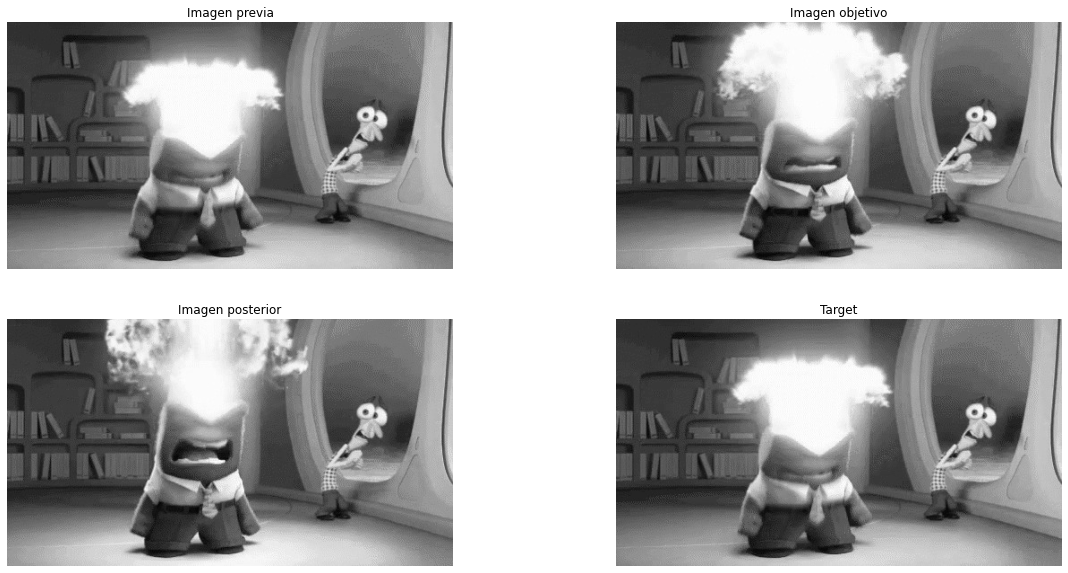

In [20]:
target = np.array(pixeles).reshape(276, 498) 

imagen = cv2.imread("Anger/{}.jpg".format(obj-1)) 
img1 = cv2.cvtColor(imagen,cv2.COLOR_BGR2GRAY)  
imagen = cv2.imread("Anger/{}.jpg".format(obj)) 
img2 = cv2.cvtColor(imagen,cv2.COLOR_BGR2GRAY)  
imagen = cv2.imread("Anger/{}.jpg".format(obj+1)) 
img3 = cv2.cvtColor(imagen,cv2.COLOR_BGR2GRAY)  

plt.figure(figsize=(20,10))
ax1 = plt.subplot(221)
ax1.set_title('Imagen previa')
ax1.imshow(img1, cmap = "binary_r")
ax1.axis("off")
ax2 = plt.subplot(222)
ax2.set_title('Imagen objetivo')
ax2.imshow(img2, cmap = "binary_r")
ax2.axis("off")
ax3 = plt.subplot(223)
ax3.set_title('Imagen posterior')
ax3.imshow(img3, cmap = "binary_r")
ax3.axis("off")
ax4 = plt.subplot(224)
ax4.set_title('Target')
ax4.imshow(target, cmap = "binary_r")
ax4.axis("off")
plt.show()

El árbol de decisión ha obtenido la mejor de las predicciones con diferencia. No obstante, la imagen obtenida es muy similar a la anterior, así que, una vez más, limitaremos el número de fotogramas de entrada para ver si mejora.

In [21]:
data = []
for i in range(10,24):
    if i != 12:
        imagen = cv2.imread("Anger/{}.jpg".format(i))
        img = cv2.cvtColor(imagen,cv2.COLOR_BGR2GRAY) 
        data.append(img.flatten())
data = np.array(data)
pixeles = [] 
obj  = 12
for i in range(data.shape[1]):   
    X = np.array(list(range(10,obj))+list(range(obj+1,24))).reshape(-1, 1)
    y = data[:,i]    
    #regr = linear_model.LinearRegression()
    #regr = svm.SVR(kernel='linear')
    regr = tree.DecisionTreeRegressor()
    regr.fit(X, y)
    val = regr.predict(np.array([[obj]])) 
    pixeles.append(val)
regr.score(X, y)

1.0

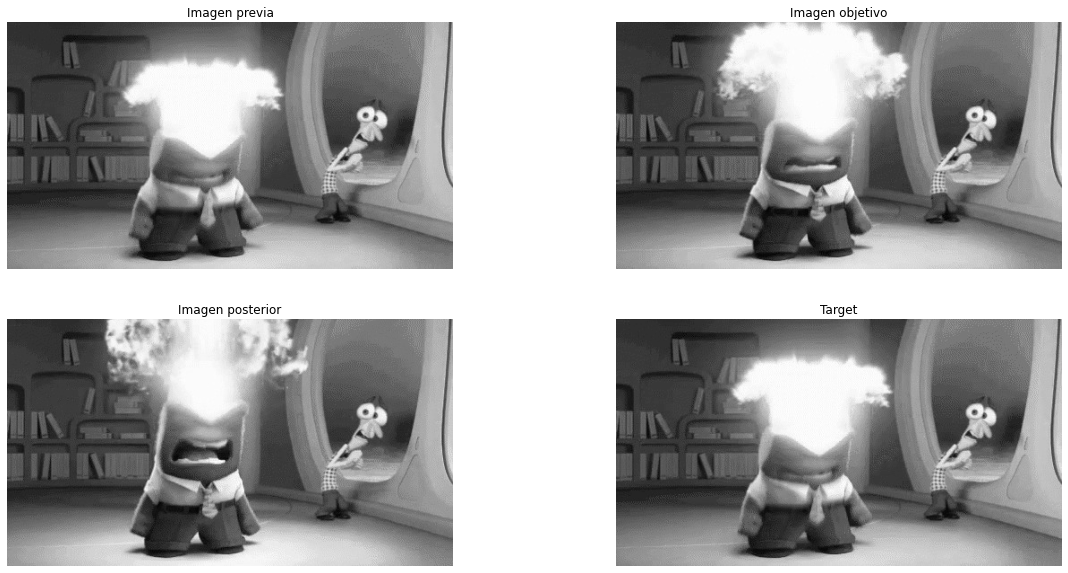

In [22]:
target = np.array(pixeles).reshape(276, 498) # Devuelve los datos al formato de matriz

imagen = cv2.imread("Anger/{}.jpg".format(obj-1)) # Lee la imagen anterior a la de la predicción
img1 = cv2.cvtColor(imagen,cv2.COLOR_BGR2GRAY) # Convierte la imagen de BGR a RGB 
imagen = cv2.imread("Anger/{}.jpg".format(obj)) # Lee la imagen original que queremos predecir
img2 = cv2.cvtColor(imagen,cv2.COLOR_BGR2GRAY) # Convierte la imagen de BGR a RGB 
imagen = cv2.imread("Anger/{}.jpg".format(obj+1)) # Lee la imagen posterior a la de la predicción
img3 = cv2.cvtColor(imagen,cv2.COLOR_BGR2GRAY) # Convierte la imagen de BGR a RGB 

plt.figure(figsize=(20,10))
ax1 = plt.subplot(221)
ax1.set_title('Imagen previa')
ax1.imshow(img1, cmap = "binary_r")
ax1.axis("off")
ax2 = plt.subplot(222)
ax2.set_title('Imagen objetivo')
ax2.imshow(img2, cmap = "binary_r")
ax2.axis("off")
ax3 = plt.subplot(223)
ax3.set_title('Imagen posterior')
ax3.imshow(img3, cmap = "binary_r")
ax3.axis("off")
ax4 = plt.subplot(224)
ax4.set_title('Target')
ax4.imshow(target, cmap = "binary_r")
ax4.axis("off")
plt.show()